In [1]:
import pandas as pd

try:
    df_income = pd.read_csv('https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/07.%20Week%207/Boosting%20or%20Bagging%20Classification/income.csv')
    df_water = pd.read_csv('https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/07.%20Week%207/Boosting%20or%20Bagging%20Classification/CitarumWater.csv')
    df_heart = pd.read_csv('https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/07.%20Week%207/Boosting%20or%20Bagging%20Classification/HeartDisease.csv')

    display(df_income.head())
    display(df_water.head())
    display(df_heart.head())

except FileNotFoundError:
    print("Error")
except pd.errors.ParserError:
    print("Error")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [21]:
print("df_income info:")
df_income_info = df_income.info()
print("\ndf_income describe:")
df_income_desc = df_income.describe()

print("\ndf_water info:")
df_water_info = df_water.info()
print("\ndf_water describe:")
df_water_desc = df_water.describe()

print("\ndf_heart info:")
df_heart_info = df_heart.info()
print("\ndf_heart describe:")
df_heart_desc = df_heart.describe()

display(df_income_info)
display(df_income_desc)
display(df_water_info)
display(df_water_desc)
display(df_heart_info)
display(df_heart_desc)

for col in ['workclass', 'occupation', 'native-country']:
    df_income[col] = df_income[col].fillna(df_income[col].mode()[0])

Q1_age = df_income['age'].quantile(0.25)
Q3_age = df_income['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
df_income = df_income[(df_income['age'] >= lower_bound_age) & (df_income['age'] <= upper_bound_age)]

df_income['capital-gain'] = df_income['capital-gain'].clip(lower=0)

display(df_income.head())
display(df_water.head())
display(df_heart.head())


df_income info:
<class 'pandas.core.frame.DataFrame'>
Index: 48469 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48469 non-null  int64 
 1   workclass       48469 non-null  object
 2   fnlwgt          48469 non-null  int64 
 3   education       48469 non-null  object
 4   education-num   48469 non-null  int64 
 5   marital-status  48469 non-null  object
 6   occupation      48469 non-null  object
 7   relationship    48469 non-null  object
 8   race            48469 non-null  object
 9   sex             48469 non-null  object
 10  capital-gain    48469 non-null  int64 
 11  capital-loss    48469 non-null  int64 
 12  hours-per-week  48469 non-null  int64 
 13  native-country  48469 non-null  object
 14  income          48469 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB

df_income describe:

df_water info:
<class 'pandas.core.frame.DataFrame'>
RangeIn

None

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48469.000000,4.846900e+04,48469.000000,48469.000000,48469.000000,48469.000000
mean,38.319462,1.898884e+05,10.086220,1075.559946,87.406734,40.532567
std,13.247521,1.057115e+05,2.559947,7447.255078,402.241158,12.295059
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.378790e+05,12.000000,0.000000,0.000000,45.000000
max,75.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


None

,No,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
count,2500.00000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,1250.50000,7.032305,2.555000e+01,27.856368,3.882005,4.005476,20.511768,1.970393,1.418937e+04,0.074547,1.365796,1.650000
std,721.83216,0.578179,1.154863e-12,10.551351,2.249329,2.697375,8.969809,1.175104,2.526550e+05,0.320970,1.220703,0.547375
min,1.00000,6.002441,2.555000e+01,5.000000,0.002140,1.640000,5.440000,0.003784,5.000000e+01,0.004300,0.430000,1.000000
25%,625.75000,6.520722,2.555000e+01,23.597278,1.925925,2.754331,14.999275,0.955443,2.924867e+02,0.048199,0.840000,1.000000
50%,1250.50000,7.056001,2.555000e+01,27.671133,3.892147,3.800133,20.044252,1.920408,5.375973e+02,0.065606,1.170000,2.000000
75%,1875.25000,7.531846,2.555000e+01,31.747063,5.828533,4.947965,25.155492,3.014985,7.829760e+02,0.083315,1.570000,2.000000
max,2500.00000,8.710000,2.555000e+01,318.000000,7.800000,55.300000,190.000000,5.240000,9.200000e+06,16.000000,14.900000,4.000000


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [19]:
df_income['capital-loss'] = df_income['capital-loss'].clip(lower=0)

for col in ['workclass', 'occupation', 'native-country']:
    most_frequent = df_income[col].mode()[0]
    df_income[col] = df_income[col].fillna(most_frequent)

df_water['Temp'] = df_water['Temp'].astype(str).str.replace('°C', '', regex=False)
df_water['Temp'] = pd.to_numeric(df_water['Temp'], errors='coerce')
df_water['Temp'] = df_water['Temp'].fillna(df_water['Temp'].mean())

df_heart['ca'] = df_heart['ca'].fillna(df_heart['ca'].median())
df_heart['thal'] = df_heart['thal'].fillna(df_heart['thal'].median())

display(df_income.head())
display(df_water.head())
display(df_heart.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

combined_df['num'].fillna(combined_df['num'].median(), inplace=True)

categorical_cols = combined_df.select_dtypes(include=['object']).columns
combined_df = pd.get_dummies(combined_df, columns=categorical_cols, drop_first=True)

X = combined_df.drop('num', axis=1)
y = combined_df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

X_train shape: (38907, 32)
X_test shape: (9727, 32)
y_train shape: (38907,)
y_test shape: (9727,)


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,Nitrat,FecalColiform,Fosfat,IP,Class,sex_1.0,sex_Male,income_<=50K.,income_>50K,income_>50K.
31522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
37067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,True,True,False,False
5550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
32312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
24564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,Nitrat,FecalColiform,Fosfat,IP,Class,sex_1.0,sex_Male,income_<=50K.,income_>50K,income_>50K.
3534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
41842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False
17419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
14839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,True,False,True,False
38623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False


,num
31522,0.0
37067,0.0
5550,0.0
32312,0.0
24564,0.0


,num
3534,0.0
41842,0.0
17419,0.0
14839,0.0
38623,0.0


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

heart_features = df_heart.drop('num', axis=1).reset_index(drop=True)
income_features = df_income[['age', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']].reset_index(drop=True)
water_features = df_water[['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP', 'Class']].reset_index(drop=True)

min_len = min(len(heart_features), len(income_features), len(water_features))

heart_features = heart_features.iloc[:min_len]
income_features = income_features.iloc[:min_len]
water_features = water_features.iloc[:min_len]
target = df_heart['num'].iloc[:min_len].reset_index(drop=True)


combined_df = pd.concat([heart_features, income_features, water_features, target], axis=1)

categorical_cols = combined_df.select_dtypes(include=['object']).columns
combined_df = pd.get_dummies(combined_df, columns=categorical_cols, drop_first=True)

X = combined_df.drop('num', axis=1)
y = combined_df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

X_train shape: (242, 30)
X_test shape: (61, 30)
y_train shape: (242,)
y_test shape: (61,)


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class,sex_1,sex_Male,income_>50K
97,60,4,150,258,0,2,157,0,2.6,2,...,2.110000,16.100000,1.290000,3500.000000,0.140000,2.69,2,False,False,False
82,39,3,140,321,0,2,182,0,0.0,1,...,3.420000,22.900000,1.240000,11000.000000,0.004300,4.47,2,True,True,False
167,54,2,132,288,1,2,159,1,0.0,1,...,5.181390,16.632282,2.473220,612.195196,0.081824,1.61,2,False,True,False
288,56,2,130,221,0,2,163,0,0.0,1,...,1.793304,17.337260,1.663015,644.376965,0.045247,0.61,1,True,True,False
71,67,4,125,254,1,0,163,0,0.2,2,...,2.980000,24.500000,1.100000,940.000000,0.004300,0.79,1,True,False,False


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class,sex_1,sex_Male,income_>50K
219,59,4,138,271,0,2,182,0,0.0,1,...,2.719129,23.744316,1.546312,393.388165,0.077501,0.78,1,True,True,False
271,66,4,160,228,0,2,138,0,2.3,1,...,5.377447,25.616932,3.132664,348.768578,0.052600,1.67,2,True,True,False
89,51,3,130,256,0,2,149,0,0.5,1,...,1.640000,6.440000,0.920000,790.000000,0.032000,0.59,1,False,True,False
101,34,1,118,182,0,2,174,0,0.0,1,...,2.380000,15.500000,2.620000,3500.000000,0.180000,2.70,2,True,False,False
67,54,3,150,232,0,2,165,0,1.6,1,...,6.350000,50.600000,1.480000,920.000000,0.080000,1.97,2,True,False,True


,num
97,3
82,0
167,0
288,0
71,3


,num
219,0
271,0
89,0
101,0
67,0


In [9]:
cols_to_drop = [x for x in X_train.columns if X_train.columns.tolist().count(x) > 1]
X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_test = X_test.loc[:,~X_test.columns.duplicated()]

print("Columns dropped from X_train:", cols_to_drop)
print("\nX_train columns:", X_train.columns.tolist())
print("\nX_test columns:", X_test.columns.tolist())

import numpy as np
from sklearn.preprocessing import StandardScaler

X_train['age_hours_interaction'] = X_train['age_heart'] * X_train['hours-per-week']
X_test['age_hours_interaction'] = X_test['age_heart'] * X_test['hours-per-week']

X_train['age_capital_interaction'] = X_train['age_heart'] * X_train['capital-gain']
X_test['age_capital_interaction'] = X_test['age_heart'] * X_test['capital-gain']


numerical_features = ['age_heart', 'trestbps', 'chol', 'thalach', 'oldpeak', 'capital-gain', 'capital-loss', 'hours-per-week', 'pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']

for feature in numerical_features:
    X_train[feature + '_squared'] = X_train[feature] ** 2
    X_test[feature + '_squared'] = X_test[feature] ** 2

scaler = StandardScaler()
numerical_cols = X_train.select_dtypes(include=np.number).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

display(X_train.head())
display(X_test.head())

Columns dropped from X_train: ['age_heart', 'age_heart']

X_train columns: ['age_heart', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'capital-gain', 'capital-loss', 'hours-per-week', 'pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP', 'Class', 'sex_1', 'sex_Male', 'income_>50K']

X_test columns: ['age_heart', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'capital-gain', 'capital-loss', 'hours-per-week', 'pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP', 'Class', 'sex_1', 'sex_Male', 'income_>50K']


,age_heart,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,pH_squared,Temp_squared,TSS_squared,DO_squared,BOD_squared,COD_squared,Nitrat_squared,FecalColiform_squared,Fosfat_squared,IP_squared
97,0.594945,0.877858,1.020911,0.169014,-0.418040,1.027269,0.307680,-0.696177,1.320132,0.655669,...,1.241392,1.136868e-13,-0.165518,0.555874,-0.232293,-0.319348,-0.635844,-0.100947,-0.064016,-0.255805
82,-1.711319,-0.158443,0.463338,1.327117,-0.418040,1.027269,1.411752,-0.696177,-0.900796,-0.963432,...,0.386440,1.136868e-13,-0.109171,-0.333087,-0.203904,-0.175187,-0.658767,-0.100930,-0.065209,0.086186
167,-0.063987,-1.194743,0.017280,0.720492,2.392117,1.027269,0.396006,1.436416,-0.900796,-0.963432,...,-0.822673,1.136868e-13,-0.132949,0.673487,-0.144532,-0.309877,0.171025,-0.100949,-0.064802,-0.380422
288,0.155657,-1.194743,-0.094234,-0.511143,-0.418040,1.027269,0.572657,-0.696177,-0.900796,-0.963432,...,-1.275297,1.136868e-13,-0.068271,1.676922,-0.237138,-0.296859,-0.436240,-0.100949,-0.065085,-0.439993
71,1.363700,0.877858,-0.373021,0.095483,2.392117,-0.985679,0.572657,-0.696177,-0.729955,0.655669,...,-0.990308,1.136868e-13,-0.165518,-0.033290,-0.214939,-0.133961,-0.718131,-0.100949,-0.065209,-0.433231


,age_heart,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,pH_squared,Temp_squared,TSS_squared,DO_squared,BOD_squared,COD_squared,Nitrat_squared,FecalColiform_squared,Fosfat_squared,IP_squared
219,0.485123,0.877858,0.351824,0.407987,-0.41804,1.027269,1.411752,-0.696177,-0.900796,-0.963432,...,-1.475735,1.136868e-13,-0.134828,-0.884824,-0.220766,-0.153779,-0.504109,-0.100949,-0.064844,-0.433652
271,1.253878,0.877858,1.578483,-0.382464,-0.41804,1.027269,-0.531414,-0.696177,1.063871,-0.963432,...,-0.479132,1.136868e-13,-0.132009,0.000127,-0.136419,-0.103532,0.840909,-0.100949,-0.065041,-0.375141
89,-0.393454,-0.158443,-0.094234,0.132248,-0.41804,1.027269,-0.045623,-0.696177,-0.473694,-0.963432,...,1.023001,1.136868e-13,-0.185195,1.077406,-0.239200,-0.437708,-0.784018,-0.100949,-0.065148,-0.440637
101,-2.260429,-2.231043,-0.763321,-1.228064,-0.41804,1.027269,1.058449,-0.696177,-0.900796,-0.963432,...,0.519136,1.136868e-13,-0.181618,0.593454,-0.227543,-0.329654,0.306493,-0.100947,-0.063237,-0.254359
67,-0.063987,-0.158443,1.020911,-0.308934,-0.41804,1.027269,0.660983,-0.696177,0.465929,-0.963432,...,0.087853,1.136868e-13,-0.179493,-0.358257,-0.091722,0.931541,-0.540474,-0.100949,-0.064820,-0.345838


In [10]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

boosting_model = xgb.XGBClassifier(random_state=42)
bagging_model = RandomForestClassifier(random_state=42)

boosting_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

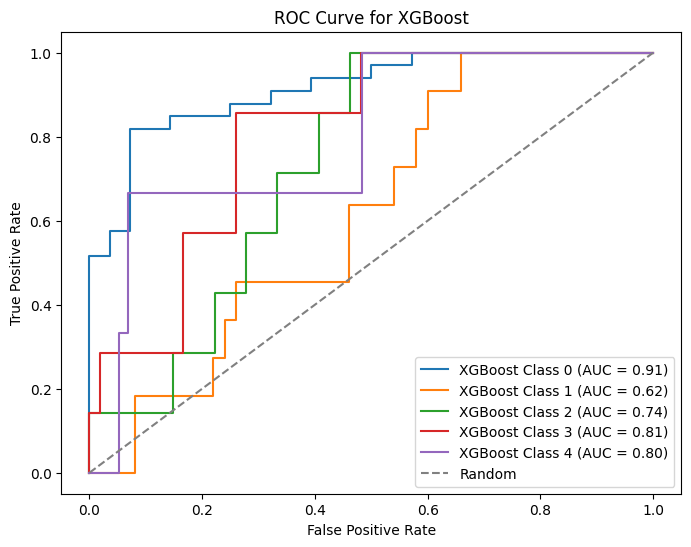

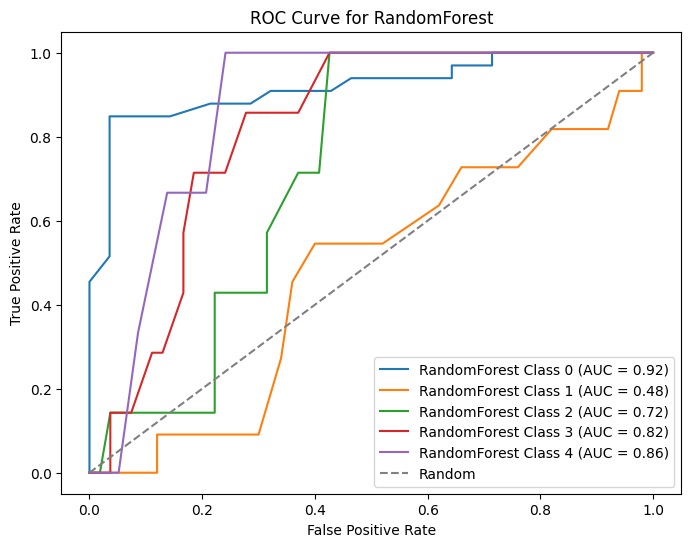

,Model,Accuracy,Precision,Recall,F1-score,AUC
0,XGBoost,0.557377,0.546965,0.557377,0.541900,0.668655
1,RandomForest,0.524590,0.389071,0.524590,0.446406,0.639188


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

y_pred_boosting = boosting_model.predict(X_test)
y_pred_bagging = bagging_model.predict(X_test)

y_prob_boosting = boosting_model.predict_proba(X_test)
y_prob_bagging = bagging_model.predict_proba(X_test)

metrics = {
    'Accuracy': (accuracy_score, {}),
    'Precision': (precision_score, {'average': 'weighted', 'zero_division': 0}),
    'Recall': (recall_score, {'average': 'weighted', 'zero_division': 0}),
    'F1-score': (f1_score, {'average': 'weighted', 'zero_division': 0}),
    'AUC': (roc_auc_score, {'multi_class': 'ovo'})
}
results = []

for model_name, model_predictions, model_probabilities in [('XGBoost', y_pred_boosting, y_prob_boosting), ('RandomForest', y_pred_bagging, y_prob_bagging)]:
    row = {'Model': model_name}
    for metric_name, (metric_func, metric_params) in metrics.items():
        if metric_name == 'AUC':
            row[metric_name] = metric_func(y_test, model_probabilities, **metric_params)
        else:
            row[metric_name] = metric_func(y_test, model_predictions, **metric_params)
    results.append(row)

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_boosting[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob_boosting[:, i])


plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'XGBoost Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_bagging[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob_bagging[:, i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'RandomForest Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForest')
plt.legend()
plt.show()


import pandas as pd
results_df = pd.DataFrame(results)
display(results_df)

In [18]:
print("Model Evaluation Results:")
display(results_df)

print("\nAnalysis:")
print("XGBoost and RandomForest Model Comparison:")

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']:
  xgb_score = results_df[results_df['Model'] == 'XGBoost'][metric].values[0]
  rf_score = results_df[results_df['Model'] == 'RandomForest'][metric].values[0]
  print(f"- {metric}:")
  print(f"  XGBoost: {xgb_score:.4f}")
  print(f"  RandomForest: {rf_score:.4f}")
  if xgb_score > rf_score:
    print(f"  XGBoost performs better in this metric.")
  elif rf_score > xgb_score:
    print(f"  RandomForest performs better in this metric.")
  else:
    print(f"  Both models have equal performance in this metric.")

Model Evaluation Results:


,Model,Accuracy,Precision,Recall,F1-score,AUC
0,XGBoost,0.557377,0.546965,0.557377,0.541900,0.668655
1,RandomForest,0.524590,0.389071,0.524590,0.446406,0.639188



Analysis:
XGBoost and RandomForest Model Comparison:
- Accuracy:
  XGBoost: 0.5574
  RandomForest: 0.5246
  XGBoost performs better in this metric.
- Precision:
  XGBoost: 0.5470
  RandomForest: 0.3891
  XGBoost performs better in this metric.
- Recall:
  XGBoost: 0.5574
  RandomForest: 0.5246
  XGBoost performs better in this metric.
- F1-score:
  XGBoost: 0.5419
  RandomForest: 0.4464
  XGBoost performs better in this metric.
- AUC:
  XGBoost: 0.6687
  RandomForest: 0.6392
  XGBoost performs better in this metric.


# Matriks Evaluasi Terbaik
 F1-score adalah matriks evaluasi yang paling tepat. Karena prediksi penyakit jantung membutuhkan keseimbangan antara meminimalkan false positive (salah mendiagnosis penyakit jantung) dan false negative (melewatkan kasus aktual). F1-score secara langsung mencerminkan keseimbangan ini.

# Persamaan Matematika

*   **Akurasi**: Mengukur proporsi prediksi yang benar. Namun, akurasi bisa menyesatkan jika dataset tidak seimbang (jumlah kasus positif dan negatif berbeda jauh).
*   **Presisi**: Mengukur proporsi prediksi positif yang benar. Penting jika biaya false positive tinggi.
*   **Recall (Sensitivitas)**: Mengukur proporsi kasus positif aktual yang diprediksi dengan benar. Penting jika biaya false negative tinggi.
*   **AUC (Area Under the ROC Curve)**: Mengukur kemampuan model untuk membedakan antara kelas positif dan negatif. Berguna untuk membandingkan performa model secara keseluruhan.
Penjelasan Persamaan Matematika
Berikut penjelasan untuk setiap persamaan matematika yang relevan dengan matriks evaluasi:

# 1. Akurasi:

`Akurasi = (TP + TN) / (TP + TN + FP + FN)`

*   **TP**: True Positive (prediksi positif yang benar)
*   **TN**: True Negative (prediksi negatif yang benar)
*   **FP**: False Positive (prediksi positif yang salah)
*   **FN**: False Negative (prediksi negatif yang salah)

# 2. Presisi:

`Presisi = TP / (TP + FP)`

# 3. Recall (Sensitivitas):

`Recall = TP / (TP + FN)`

# 4. F1-score:

`F1-score = 2 * (Presisi * Recall) / (Presisi + Recall)`

F1-score adalah harmonic mean dari presisi dan recall.

# 5. AUC (Area Under the ROC Curve):

AUC dihitung berdasarkan kurva ROC (Receiver Operating Characteristic), yang memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR) pada berbagai threshold. AUC merepresentasikan luas area di bawah kurva ROC. Semakin tinggi AUC, semakin baik kemampuan model dalam membedakan antara kelas positif dan negatif.